In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install geopandas
!pip -q install geojson
!pip -q install --upgrade folium
!pip -q install geemap
!pip -q install rasterio
!pip -q install tqdm
!pip -q install fastai

     |████████████████████████████████| 972kB 12.4MB/s 
     |████████████████████████████████| 6.5MB 56.2MB/s 
     |████████████████████████████████| 14.8MB 247kB/s 
     |████████████████████████████████| 102kB 4.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0 which is incompatible.
     |████████████████████████████████| 389kB 13.0MB/s 
     |████████████████████████████████| 5.1MB 32.4MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 1.9MB 57.0MB/s 
     |████████████████████████████████| 153kB 45.4MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 225kB 42.5MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 983kB 33.2MB/s 
     |████████████████████████████████| 1.1MB 50.9MB/s 
     |████████████████████████████████| 122kB 58.0MB/s 
     |████████████████████████████████| 235kB 44.8MB/s 


In [ ]:
from datetime import datetime

from fastai import *
from fastai.vision import *

import os
from tqdm import tqdm
import pandas as pd
import geopandas as gpd

from matplotlib.pyplot import imshow
from skimage import io

import rasterio as rio
import rasterio.mask
from rasterio.plot import show
from rasterio import windows
from shapely.geometry import box

SEED = 42

In [ ]:
#Convert to RGB 
def get_rgb(path) :
  red = rio.open(path).read(4) # B4
  green = rio.open(path).read(3) # B3
  blue = rio.open(path).read(2) # B2

  rgb = np.dstack((red, green, blue))

  # normalize and convert to range 0-255
  rgb = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype('uint8')

  return rgb

In [ ]:
#Load TIFF paths
from pathlib import Path
import glob

before_dir = 'drive/My Drive/dl_aoi/Kenya_AOI_before_224_clean/'
before_tif = Path(before_dir)
before_tif_imgs = glob.glob(os.path.join(before_tif,'*.tif'))

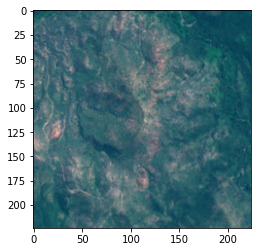

In [ ]:
#View the RGB version of an image
im = get_rgb(before_tif_imgs[0])
plt.imshow(im)

In [ ]:
plt.imsave('test.png',im )

In [ ]:
from PIL import Image

#Make prediction
infer = load_learner('drive/My Drive/models/resnetEurosat')

crop_image = crop(open_image('test.png'), 224, 0, 0)
pred = infer.predict(crop_image)
int(pred[1])

3

In [ ]:
#Saving all images in an RGB folder for convenience, can be skipped if converting to PIL formats
import cv2

before_png_dir = "drive/My Drive/Kenya_before_PNG_clean/"
if not os.path.exists(before_png_dir):
    os.makedirs(before_png_dir)

for i in range(len(before_tif_imgs)):

  im = get_rgb(before_tif_imgs[i])

  index1 = before_tif_imgs[i].find("/kenya_aoi_before")
  index2 = before_tif_imgs[i].find(".tif")
  fname = (before_tif_imgs[i])[index1+1:index2]

  im_name = before_png_dir+"/"+ fname + ".png"
  #print(im_name)

  cv2.imwrite(im_name, im)

#End of saving all files in the given location

In [ ]:
#Set up the RGB directories correctly
from pathlib import Path
import glob

before_dir = "drive/My Drive/Kenya_before_PNG_clean/"
before_png = Path(before_dir)
before_png_imgs = glob.glob(os.path.join(before_png,'*.png'))

In [ ]:
len(before_png_imgs)

348

In [ ]:
#Make prediction
infer = load_learner('drive/My Drive/models/resnetEurosat')

#Classes lookup (taken from the model development code notebook)
Class_list = ['Cropland', 'Forestland', 'Otherland', 'Pastureland', 'Water']

#Save labels in a dataframe
df = pd.DataFrame(columns=['path', 'prediction'])

#Loop through all images in the PNG folder
for i in range(len(before_png_imgs)):

  crop_image = crop(open_image(before_png_imgs[i]), 224, 0, 0)
  pred = infer.predict(crop_image)
  label = str(Class_list[int(pred[1])])
 
  df = df.append({'path': before_png_imgs[i], 'prediction': label}, ignore_index=True)

df.head(5)

,path,prediction
0,drive/My Drive/Kenya_before_PNG_clean/kenya_ao...,Otherland
1,drive/My Drive/Kenya_before_PNG_clean/kenya_ao...,Otherland
2,drive/My Drive/Kenya_before_PNG_clean/kenya_ao...,Otherland
3,drive/My Drive/Kenya_before_PNG_clean/kenya_ao...,Otherland
4,drive/My Drive/Kenya_before_PNG_clean/kenya_ao...,Otherland


In [ ]:
df.to_csv('drive/My Drive/models/Kenya-before_predictions.txt', sep='\t')

In [ ]:
gk = df.groupby('prediction').nunique()
gk

,path
prediction,
Cropland,2
Forestland,4
Otherland,336
Water,6


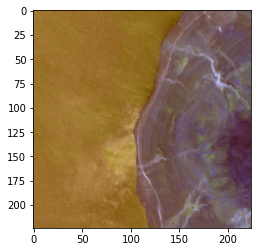

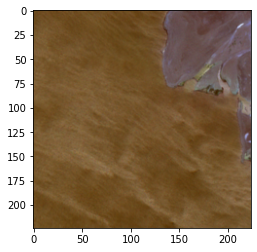

In [ ]:
#Visualisation of Cropland
for index,row in df.iterrows():

      if (row['prediction']=='Cropland'):
        img = io.imread(row['path'])
        plt.figure()
        plt.imshow(img)


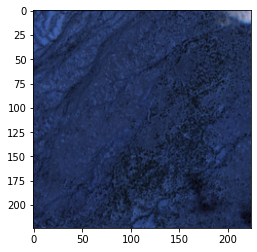

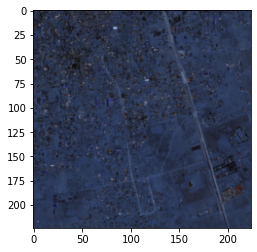

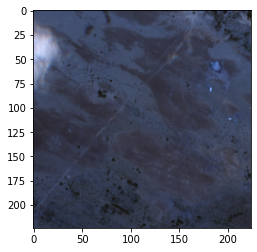

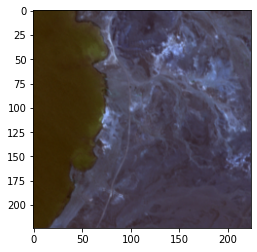

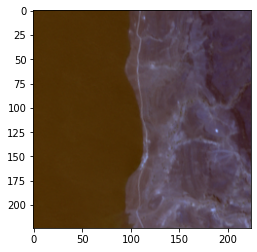

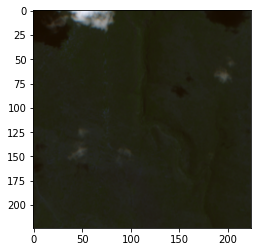

In [ ]:
for index,row in df.iterrows():

      if (row['prediction']=='Water'):
        img = io.imread(row['path'])
        plt.figure()
        plt.imshow(img)